In [1]:
%run ./DataGen2.ipynb

In [2]:
my_font_size = 16
plt.rcParams.update({'font.size': 16})
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

figures_saving_path = '/Users/Eliana/Documents/PDM/Codes/My_codes/automatic_T/'

In [3]:
def subfig_point_cloud(ax, data, title):
    P              = data[['x','y']].to_numpy()
    labels         = data['labels_1'].to_numpy()

    ax.scatter(P[:,0], P[:,1], c = 'black', s = 0.05)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title, fontsize=my_font_size -2, fontweight="bold")
    ax.set_box_aspect(1)
    pass
    

def subfig_result(ax, P, labels):
    not_noise_idx = np.where(labels != 0)
    noise_idx = np.where(labels == 0)

    #ax.scatter(P[noise_idx,0], P[noise_idx,1], c = 'tab:blue', s = 0.01)
    #ax.scatter(P[not_noise_idx, 0], P[not_noise_idx, 1], c = labels[not_noise_idx], cmap = 'rainbow_r', s = 1)
    ax.scatter(P[not_noise_idx, 0], P[not_noise_idx, 1], c = 'black', s = 0.05)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('denoised point-cloud',fontsize=my_font_size -2, fontweight="bold")
    ax.set_box_aspect(1)
    
    
    
def subfig_histo(ax,density,T = 0, title = ''):
    ax.hist(density, bins = 50)
    ax.grid()
    if T != 0:
        ax.axvline(x=T, label='T = ' + '%.3f'%(T), c='DarkOrange', linewidth=3)
        ax.legend()
    ax.set(xlabel =r'$\rho_m$')
    ax.set(ylabel ='#nodes')
    ax.set_xlim([-0.05,1.05])
    ax.set_box_aspect(1)
    ax.set_title(title, fontsize=my_font_size -2, fontweight="bold")
    
def subfig_histo_csr(ax,density,T = 0, title = ''):
    ax.axvspan(0, T, color='lightgray', alpha = 1)
    ax.hist(density, bins = 50)
    ax.grid()
    ax.axvline(x=T, label='T = ' + '%.3f'%(T), c='DarkOrange', linewidth=3)
    ax.set(xlabel =r'$\rho_m$')
    ax.set(ylabel ='#nodes')
    ax.set_xlim([-0.05,1.05])
    ax.set_box_aspect(1)
    ax.text(0.1, 140, '95%', fontsize = my_font_size-4)
    ax.set_title(title, fontsize=my_font_size -2, fontweight="bold")
    ax.legend()


In [37]:
p = Standard_Param()
p.RandomSeed = 22

sigma_s = 32


datagen = Call_DataGenerator(p)
df_input = datagen.GetAllData()
P = datagen.GetPointsCoord()
N = len(datagen.GetPoints())
csr = CsrGenerator(N = N, x_lim = [0,4], y_lim = [0,4])
cov_matrices = np.asarray(datagen.GetPointsCovMatrix())
P_csr = csr.GetPointsCoord()
df_csr = csr.GetAllData()

In [38]:
density_csr, G = compute_density(P_csr, cov_matrices, sigma_s)
density_input, G = compute_density(P, cov_matrices, sigma_s)

In [39]:
T = compute_T_95(N, cov_matrices, sigma_s)

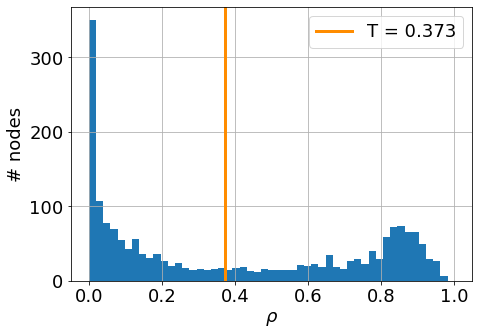

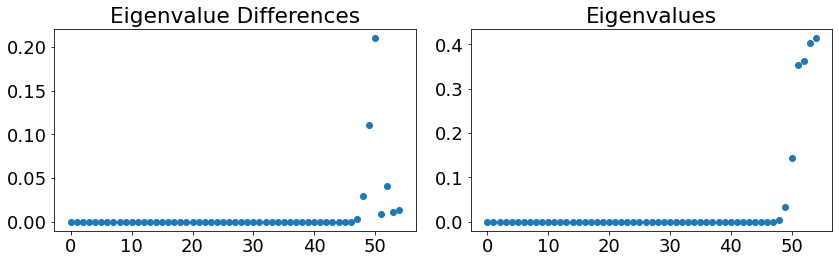

In [54]:
labels = calling_graphic(df_input, sigma_s, T)

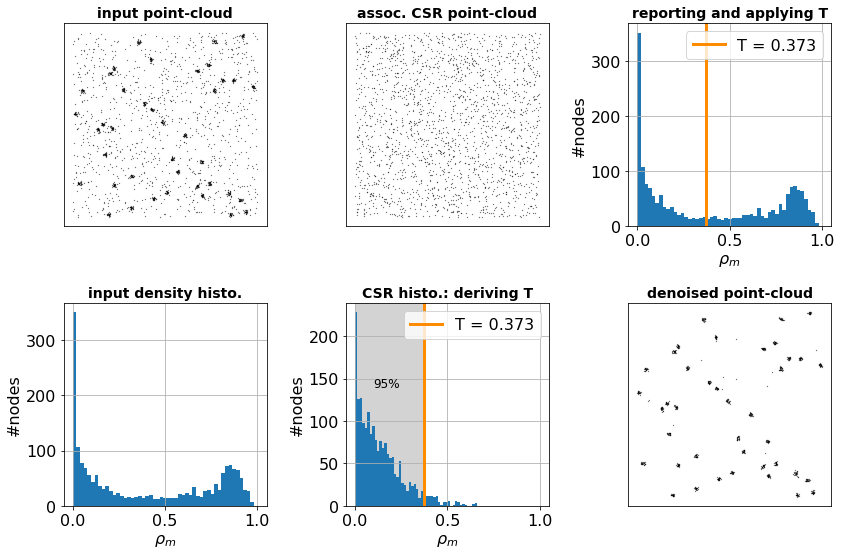

In [91]:
fig, axs = plt.subplots(2, 3, figsize = (12,8))

pc, input_h, csr, csr_h, T_h, res = axs[0,0], axs[1,0], axs[0,1], axs[1,1], axs[0,2], axs[1,2]


#plt.suptitle('title!!', fontweight="bold")
subfig_point_cloud(pc, df_input, title = 'input point-cloud')
subfig_point_cloud(csr, df_csr, title = 'assoc. CSR point-cloud')
subfig_histo(input_h, density_input, title = 'input density histo.' )
subfig_histo_csr(csr_h, density_csr, T = T, title = 'CSR histo.: deriving T') # autre titre: 'Finding T through CSR histo.'
subfig_histo(T_h, density_input, T = T, title = 'reporting and applying T')
subfig_result(res, P, labels)


plt.savefig(figures_saving_path + 'denoising_steps_example' +  '.png')



## Low Density with high noise 

In [4]:
def save_graphic_result(P, labels_clean, file_name):
    saving_path = '/Users/Eliana/Documents/PDM/Codes/My_codes/automatic_T/'
    plt.rcParams.update({'font.size': 18})


    plt.figure(figsize = (4,4))

    not_noise_idx = np.where(labels_clean != 0)
    noise_idx = np.where(labels_clean == 0)


    plt.scatter(P[noise_idx,0], P[noise_idx,1], c = 'gray', s = 0.2)
    plt.scatter(P[not_noise_idx, 0], P[not_noise_idx, 1],
                c = labels_clean[not_noise_idx], cmap = 'rainbow_r', s = 0.2)
    plt.gca().set_aspect('equal')
    plt.xticks([]), plt.yticks([])
    #plt.xlabel('x [nm]'), plt.ylabel('y [nm]')

    plt.savefig(saving_path + file_name + '.pdf')

In [121]:
#p = Standard_Param()
#p.LocPerCluster = [10] * p.NumberOfClusters
#p.NoisePercentage = 0.75
#p.RandomSeed = 30

p = Standard_Param(NumberOfClusters = 200)
p.NoisePercentage = 0.
p.RandomSeed = 25

datagen = Call_DataGenerator(p)

sigma_s = 32

datagen = Call_DataGenerator(p)
df= datagen.GetAllData()
P = datagen.GetPointsCoord()
truelabels = datagen.GetPointsLabels()
N = len(datagen.GetPoints())
#csr = CsrGenerator(N = N, x_lim = [0,4], y_lim = [0,4])
cov_matrices = np.asarray(datagen.GetPointsCovMatrix())
#P_csr = csr.GetPointsCoord()
#df_csr = csr.GetAllData()

T = compute_T_95(N,  cov_matrices, sigma_s = sigma_s)

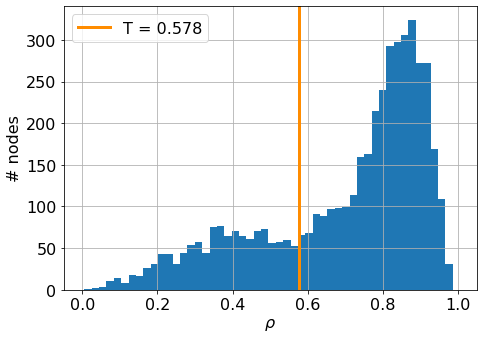

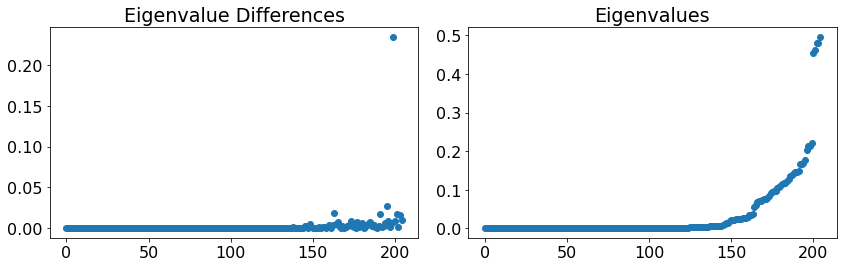

In [122]:
labels = calling_graphic(df, sigma_s, T)
labels_clean = remove_small_clusters(labels,5)

In [123]:
def subfig_LocPerCluster(ax, labels, title):
    ax.set_title(title,fontsize=my_font_size -2, fontweight="bold")
    ax.grid()
    ax.axvline(x= GT, label='GT : ' + str(GT) , c='tab:pink', linewidth=2,linestyle = '--')
    #ax.axvspan(14, 124, color='tab:pink', alpha = 0.2, label = 'GT : 14 to 124')
    unique, counts = np.unique(labels, return_counts = True)
    counts_without_noise = counts[np.where(unique != 0)]
    unique_for_bar, counts_for_bar = np.unique(counts_without_noise, return_counts = True)
    ax.bar(unique_for_bar, counts_for_bar, align = 'center', color = 'tab:olive')
    ax.legend()
    ax.set(xlabel ='#points/cluster')
    ax.set(ylabel ='#clusters')
    ax.set_box_aspect(1)

def subfig_GT(ax, P, labels):
    not_noise_idx = np.where(labels != 0)
    noise_idx = np.where(labels == 0)
    ax.scatter(P[noise_idx,0], P[noise_idx,1], c = 'tab:blue', s = 0.05)
    #ax.scatter(P[not_noise_idx, 0], P[not_noise_idx, 1], c = labels[not_noise_idx], cmap = 'rainbow_r', s = 1)
    ax.scatter(P[not_noise_idx, 0], P[not_noise_idx, 1], c = 'black', s = 0.05)
    ax.set(xlabel ='x [nm]')
    ax.set(ylabel ='y [nm]')
    ax.set_title('point-cloud GT',fontsize=my_font_size -2, fontweight="bold")
    ax.set_box_aspect(1)
    
def subfig_GT(ax, P, labels):
    not_noise_idx = np.where(labels != 0)
    noise_idx = np.where(labels == 0)
    ax.scatter(P[noise_idx,0], P[noise_idx,1], c = 'tab:blue', s = 0.05)
    #ax.scatter(P[not_noise_idx, 0], P[not_noise_idx, 1], c = labels[not_noise_idx], cmap = 'rainbow_r', s = 0.05)
    ax.scatter(P[not_noise_idx, 0], P[not_noise_idx, 1], c = 'black', s = 0.05)
    ax.set(xlabel ='x [nm]')
    ax.set(ylabel ='y [nm]')
    ax.set_title('point-cloud GT: 200 clusters',fontsize=my_font_size -2, fontweight="bold")
    ax.set_box_aspect(1)
    
    
def subfig_res(ax, P, labels):
    not_noise_idx = np.where(labels != 0)
    noise_idx = np.where(labels == 0)
    n_clusters = len(np.unique(labels))-1
    ax.scatter(P[noise_idx,0], P[noise_idx,1], c = 'gray', s = 0.01)
    ax.scatter(P[not_noise_idx, 0], P[not_noise_idx, 1],
               c = labels[not_noise_idx], cmap = 'tab10', s = 0.1)#, edgecolors = 'b')
    #ax.scatter(P[not_noise_idx, 0], P[not_noise_idx, 1], c = 'black', s = 0.05)
    ax.set(xlabel ='x [nm]')
    ax.set(ylabel ='y [nm]')
    ax.set_title('GrapHiC res.: ' + str(n_clusters) + ' clusters',fontsize=my_font_size -2, fontweight="bold")
    ax.set_box_aspect(1)

In [124]:
density, G = compute_density(P, cov_matrices, sigma_s)

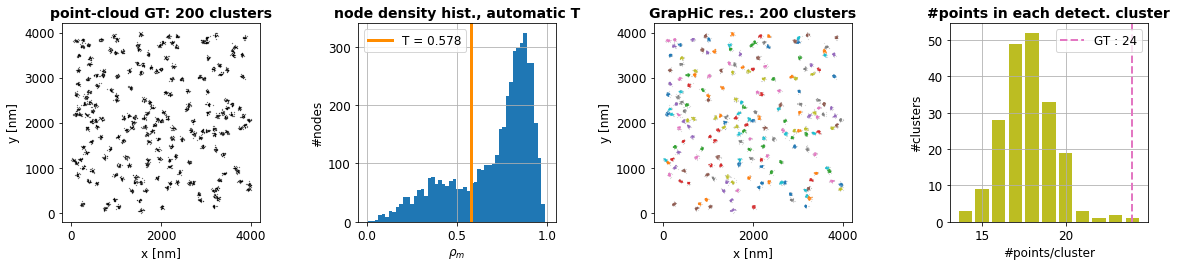

In [125]:
plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplots(1, 4, figsize = (17,4))

gt, h, res, loc = axs[0], axs[1], axs[2], axs[3]


#subfigure_LocPerCluster(loc, labels_clean, '')
subfig_GT(gt, P, np.asarray(truelabels))
subfig_res(res, P, labels_clean)
subfig_histo(h, density, T, title = 'node density hist., automatic T')
GT = 24
subfig_LocPerCluster(loc, labels_clean, '#points in each detect. cluster' )

plt.rcParams.update({'font.size': 16})

plt.savefig(figures_saving_path + 'LimitCase_Crowded' + '.pdf')

In [136]:
number_signal_points = len(np.where(labels_clean != 0)[0])
number_noise_points = len(np.where(labels_clean == 0)[0])

In [135]:
np.where(labels_clean == 0)[0]

array([   7,   11,   15, ..., 4792, 4795, 4798])

In [137]:
graphic_noise_percentage = number_noise_points / (len(labels_clean))
print(graphic_noise_percentage)

0.25916666666666666


In [114]:
def compute_and_plot_limit_case(p, file_name, GT_N_Cluster, GT_Loc):
    #p is the parameter set, an instance of the class Standard_Param
    datagen = Call_DataGenerator(p)

    sigma_s = 32

    datagen = Call_DataGenerator(p)
    df= datagen.GetAllData()
    P = datagen.GetPointsCoord()
    truelabels = datagen.GetPointsLabels()
    N = len(datagen.GetPoints())
    #csr = CsrGenerator(N = N, x_lim = [0,4], y_lim = [0,4])
    cov_matrices = np.asarray(datagen.GetPointsCovMatrix())
    #P_csr = csr.GetPointsCoord()
    #df_csr = csr.GetAllData()

    T = compute_T_95(N,  cov_matrices, sigma_s = sigma_s)
    
    labels = calling_graphic(df, sigma_s, T)
    labels_clean = remove_small_clusters(labels,5)
    
    density, G = compute_density(P, cov_matrices, sigma_s)
    
    plt.rcParams.update({'font.size': 12})
    fig, axs = plt.subplots(1, 4, figsize = (17,4))

    gt, h, res, loc = axs[0], axs[1], axs[2], axs[3]


    #subfigure_LocPerCluster(loc, labels_clean, '')
    subfig_GT(gt, P, np.asarray(truelabels))
    subfig_res(res, P, labels_clean)
    subfig_histo(h, density, T, title = 'node density hist., automatic T')
    subfig_LocPerCluster(loc, labels_clean, '#points in each detect. cluster' )

    plt.rcParams.update({'font.size': 16})

    plt.savefig(figures_saving_path + file_name + '.pdf')
    

In [ ]:
p = Standard_Param()
p.LocPerCluster = [10] * p.NumberOfClusters
p.NoisePercentage = 0.75
p.RandomSeed = 30

compute_and_plot_limit_case(p, 'LimitCase_LowDensity', 40, 10)

In [119]:


#compute_and_plot_limit_case(p, 'LimitCase_Crowded', 200, 24)

AttributeError: 'Standard_Param' object has no attribute 'plot_points'